# BEMM458J Final assignment

# Lakshay Vohra

# Student ID - 700038342

## You are a business analyst at the marketing department of Coca Cola. There is an increasing debate on social media in relation to the negative impact of plastic consumption on the environment.

## As of recently NGOs have started campaigning against Coca Cola and other multinationals. 

## General management needs you to conduct an analysis of recent conversations posted on Twitter for the purposes of determining the communication strategies followed by NGOs and how Coca Cola must engage on social media.

In [5]:
import pandas as pd

In [6]:
import re

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
pd.options.display.max_colwidth = 400

In [9]:


ConversationsLean=pd.read_csv('../data/ConversationsLean.csv')

In [10]:
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [11]:
ConversationsLean.iloc[50]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                   4
tweet.created_at                                                                                                                                                                                                                                                                                                                                                                                                    2019-12-17 19:50:37.000000
tweet.id                                                                                                                                  

In [12]:
ConversationsLean.sample(3)

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
67,21,2019-09-21 00:05:04.000000,1.175199e+18,Tomorrow is #WorldCleanupDay! If you haven't signed up to join a cleanup and brand audit now's your chance! Help us hold the biggest plastic polluters accountable for their packaging decisions. #plasticpollutes #breakfreefromplastic @brkfreeplastic https://t.co/nE6e5V9GME https://t.co/gI8Y4l99Nj,"{'hashtags': [{'text': 'WorldCleanupDay', 'indices': [12, 28]}, {'text': 'plasticpollutes', 'indices': [194, 210]}, {'text': 'breakfreefromplastic', 'indices': [211, 232]}], 'symbols': [], 'user_mentions': [{'screen_name': 'brkfreeplastic', 'name': 'breakfreefromplastic', 'id': 775875252555436032, 'id_str': '775875252555436032', 'indices': [233, 248]}], 'urls': [{'url': 'https://t.co/nE6e5V9GM...",71310291,PlasticPollutes,45953,6595,13453,...,0.031177,0.189586,0.066382,0.002185,0.003053,0.002721,0.002045,0.001987,0.006382,NGO
144,98,2018-06-09 19:10:07.000000,1.005527e+18,"""Lifestraw filters remove 99.999% of microplastics from drinking water in independent lab testing.""\n\nAs partners on our Expedition this summer, we will be using their filter straw system while traveling in order to keep our voyage #plasticfree!","{'hashtags': [{'text': 'plasticfree', 'indices': [231, 243]}], 'symbols': [], 'user_mentions': [], 'urls': []}",85732762,5gyres,24165,4022,2025,...,0.122998,0.081565,0.061746,0.002409,0.002669,0.002585,0.002394,0.002328,0.003552,NGO
256,210,2018-01-11 11:16:27.000000,9.514125e+17,We want to eliminate unnecessary and problematic single-use plastic packaging. Find out more about what we’re working towards: @circulareconomy #circulareconomy #NewPlasticsEconomy #plasticfree https://t.co/SlpAosA1Mo https://t.co/1x4HULFpeh,"{'hashtags': [{'text': 'circulareconomy', 'indices': [144, 160]}, {'text': 'NewPlasticsEconomy', 'indices': [161, 180]}, {'text': 'plasticfree', 'indices': [181, 193]}], 'symbols': [], 'user_mentions': [{'screen_name': 'circulareconomy', 'name': 'Ellen MacArthur Fdn.', 'id': 189134186, 'id_str': '189134186', 'indices': [127, 143]}], 'urls': [{'url': 'https://t.co/SlpAosA1Mo', 'expanded_url': '...",172694825,WRAP_UK,31772,1901,1963,...,0.028781,0.247309,0.029851,0.002364,0.002922,0.002697,0.002370,0.002341,0.003896,OtherInstitution


In [13]:
ConversationsLean.groupby('stakeholder').count()

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
stakeholder,,,,,,,,,,,,,,,,,,,,,
Artist,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
Multinational,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
NGO,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
OtherInstitution,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Scientific,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


## Task 1. Which Twitter users are the most popular ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider retweet and favorite counts as proxies for popularity

In [14]:
Mostpopular= ConversationsLean.groupby(['tweet.user.id','tweet.user.screen_name'])['tweet.retweet_count'].sum() + ConversationsLean.groupby(['tweet.user.id','tweet.user.screen_name'])['tweet.user.favourites_count'].sum()

In [15]:
Mostpopular.sort_values(ascending=False)


tweet.user.id        tweet.user.screen_name
71310291             PlasticPollutes           1712773.0
3459051              Greenpeace                 196623.0
85732762             5gyres                     120044.0
16579346             HealTheBay                  98966.0
23085995             Nestle                      96948.0
15071040             PlasticfreeBeth             94746.0
172694825            WRAP_UK                     90772.0
861686077            MaxLiboiron                 51244.0
28081404             janettewallis               35643.0
1362667831           NoPlasticStraws             33133.0
541280211            Algalita                    25432.0
327698038            DRussoInnovate              21880.0
109224937            Unilever                    14823.0
380346763            EnvirHealthNews              8829.0
216461261            NonToxicRev                  8659.0
36709257             captainplanetfd              8016.0
1677507408           FlotsamWeaving         

## Task 2. Which Stakeholders users are the most emotional ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: visualize levels of emotions accross stakeholders (NGOs, artists, Multinational)

In [16]:
EmotionsByStakeholders = pd.DataFrame(ConversationsLean.groupby('stakeholder')['anger','fear', 'joy', 'love', 'sadness', 'trust', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'].mean())

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
EmotionsByStakeholders

,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
stakeholder,,,,,,,,,,,,
Artist,0.191531,0.142912,0.511195,0.123589,0.179675,0.054033,0.002312,0.004153,0.003898,0.001976,0.002006,0.017433
Multinational,0.158001,0.157787,0.523263,0.105483,0.160258,0.063770,0.002394,0.002865,0.002714,0.002283,0.002258,0.005048
NGO,0.356121,0.245599,0.293706,0.063486,0.272420,0.048228,0.002920,0.008715,0.006713,0.002021,0.002076,0.038602
OtherInstitution,0.207091,0.169765,0.394409,0.059978,0.188679,0.056795,0.002396,0.002867,0.002694,0.002226,0.002192,0.005053
Scientific,0.283057,0.160679,0.407954,0.098758,0.244664,0.051185,0.002766,0.008543,0.007881,0.001990,0.002107,0.042202


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

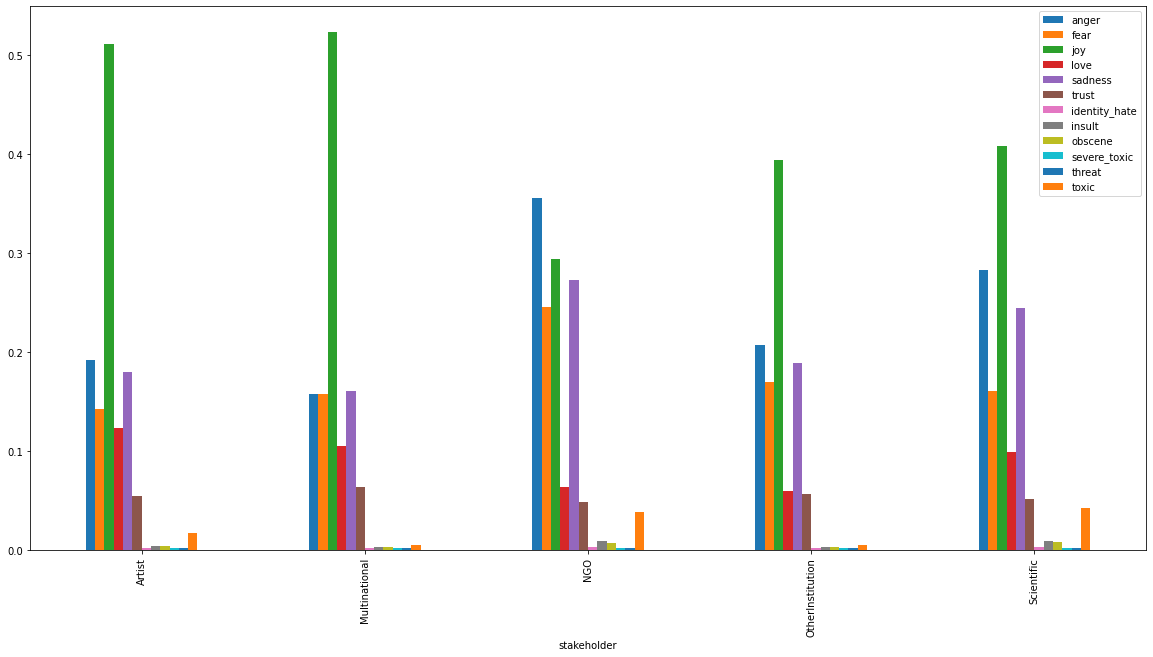

In [23]:
#barchart by stakeholders
EmotionsByStakeholders.plot.bar(figsize=(20,10))

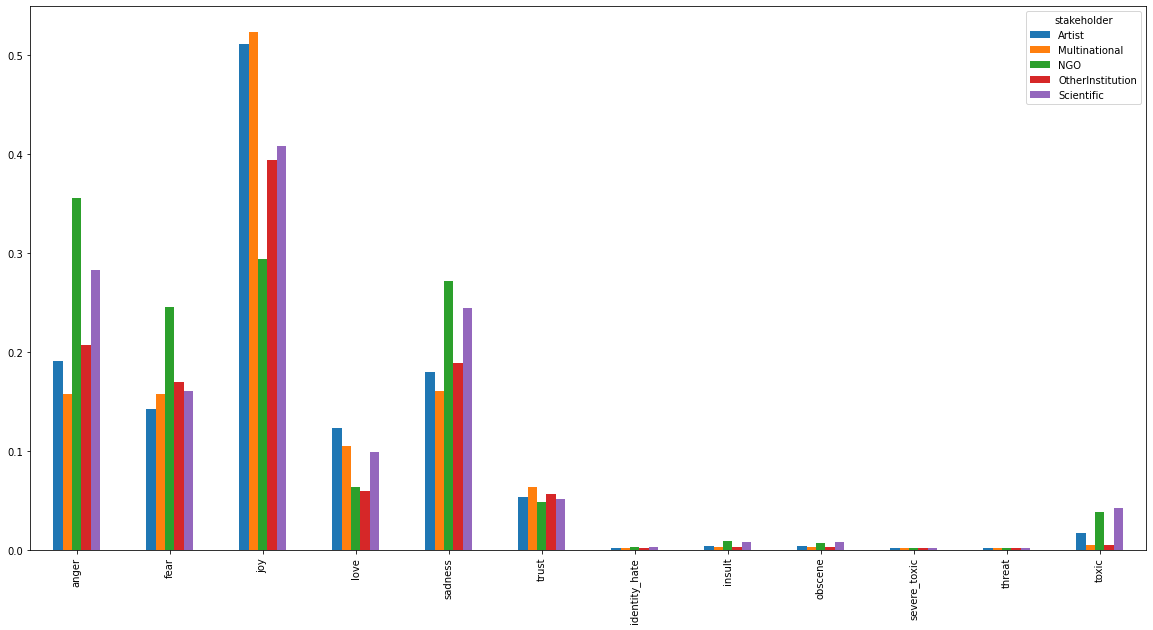

In [22]:
#Transposing the df to draw a barchart by emotions
EmotionsByStakeholders_transposed = EmotionsByStakeholders.T
#barchart by emotions
EmotionsByStakeholders_transposed.plot.bar(figsize=(20,10))

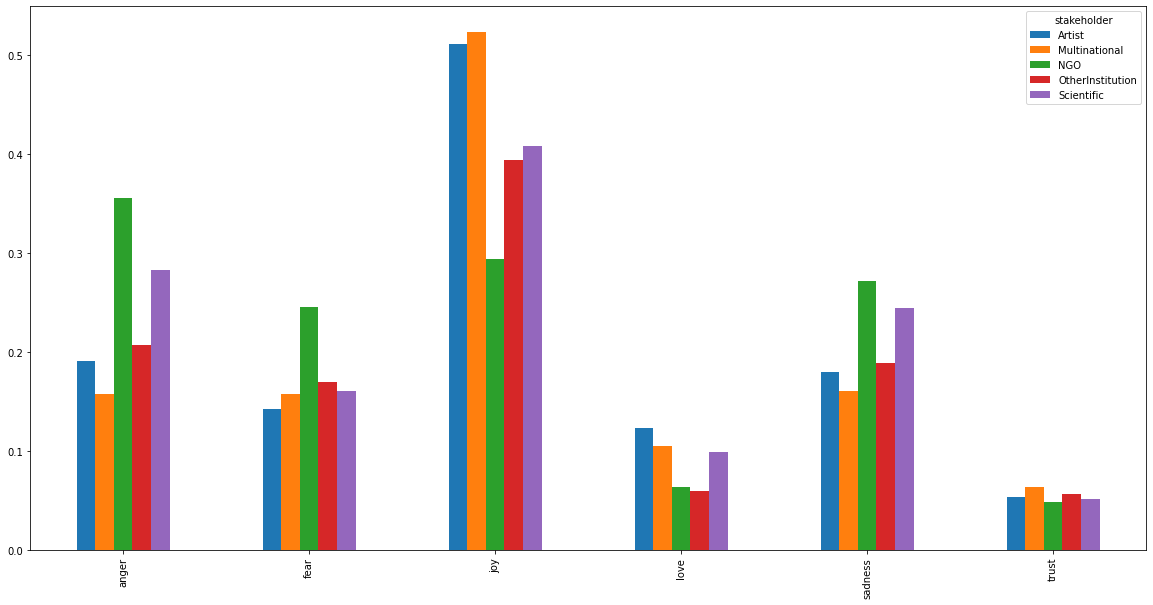

In [24]:
#Splitting the emotions data, since it is hard to interpret the least represented emotions in the whole barchart
#most represented emotions
most_represented_emotions = EmotionsByStakeholders[['anger', 'fear', 'joy','love','sadness', 'trust']]
#transposing the df
most_represented_emotions_tr = most_represented_emotions.T
#barplot
most_represented_emotions_tr.plot.bar(figsize=(20,10))

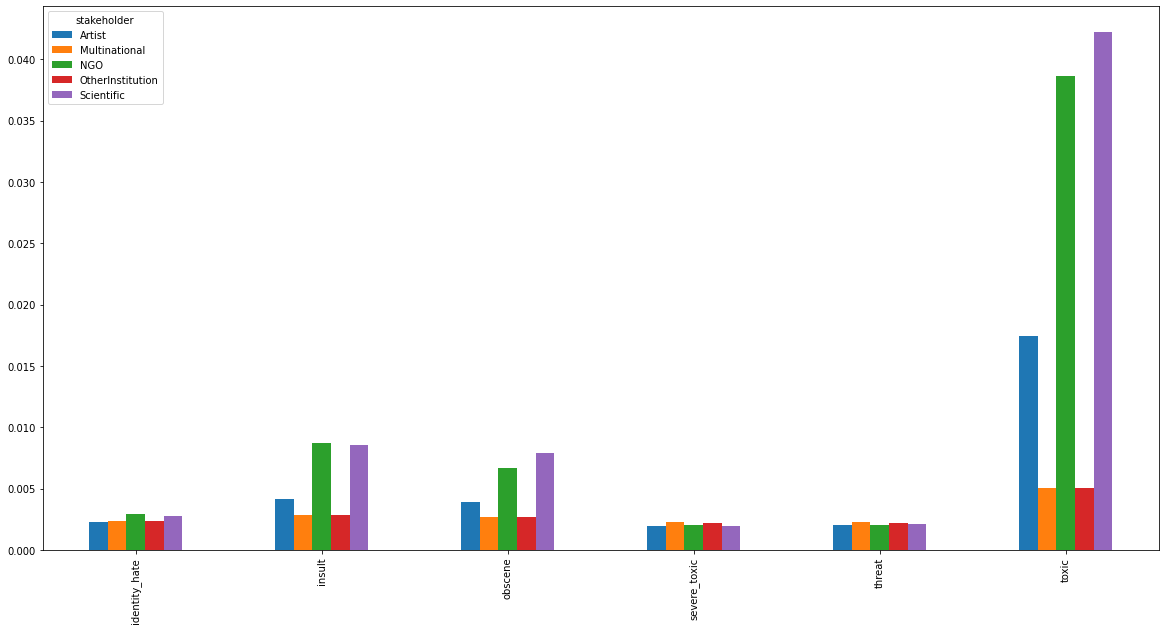

In [25]:
#barchart of least represented emotions
least_represented_emotions = EmotionsByStakeholders[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]
#transposing the df
least_represented_emotions_tr = least_represented_emotions.T
#barchart
least_represented_emotions_tr.plot.bar(figsize=(20,10))

## Task 3. Do emotions play a role in the number of retweets and favorites achieved by tweets ? (20 %)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip:  correlations between variables
### Tip:  visualizations relating variables
### Tip:  optionally consider basic regression models to determine the impact of some variables on others (e.g. impact of love on favorite, impact of fear on retweet)

In [20]:
EmotionsCorrelation = pd.DataFrame(ConversationsLean.groupby('stakeholder')['anger', 'fear', 'joy', 'love', 'sadness', 'trust', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'].mean())


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


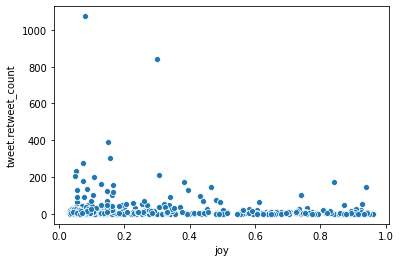

In [21]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['joy']
sns.scatterplot(x=joy, y=tweet_retweet_count)

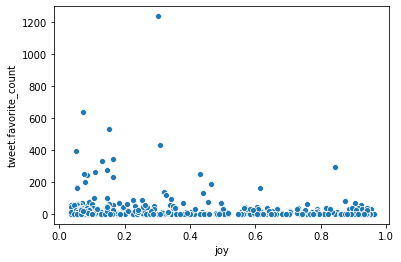

In [22]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['joy']
sns.scatterplot(x=joy, y=tweet_favorite)

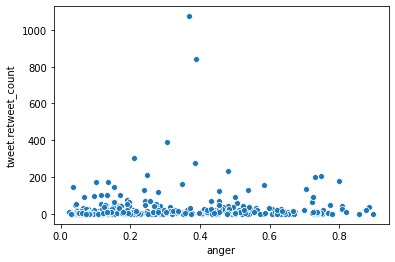

In [23]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['anger']
sns.scatterplot(x=joy, y=tweet_retweet_count)

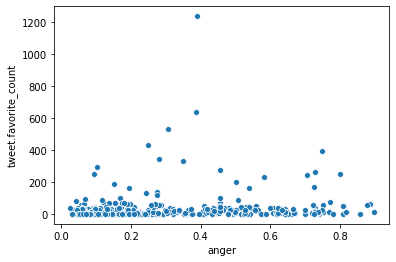

In [24]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['anger']
sns.scatterplot(x=joy, y=tweet_favorite)

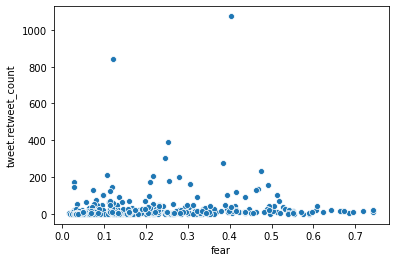

In [25]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['fear']
sns.scatterplot(x=joy, y=tweet_retweet_count)

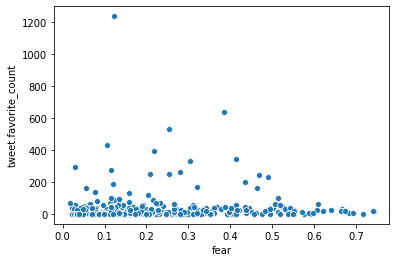

In [26]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['fear']
sns.scatterplot(x=joy, y=tweet_favorite)

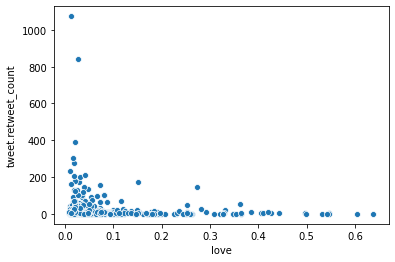

In [27]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['love']
sns.scatterplot(x=joy, y=tweet_retweet_count)

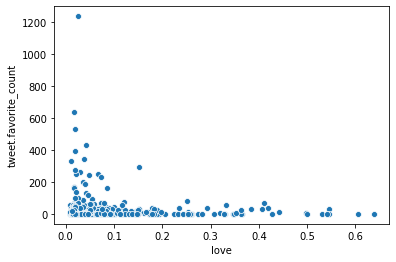

In [28]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['love']
sns.scatterplot(x=joy, y=tweet_favorite)

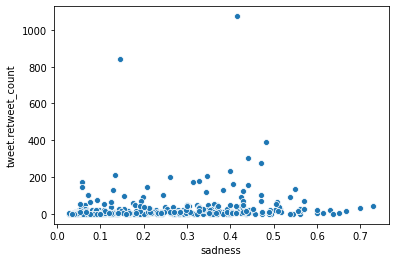

In [29]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['sadness']
sns.scatterplot(x=joy, y=tweet_retweet_count)

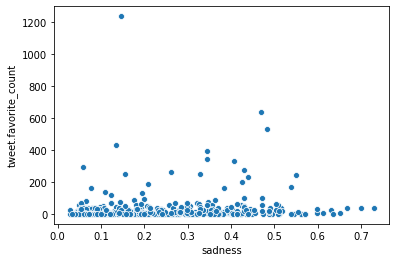

In [30]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['sadness']
sns.scatterplot(x=joy, y=tweet_favorite)

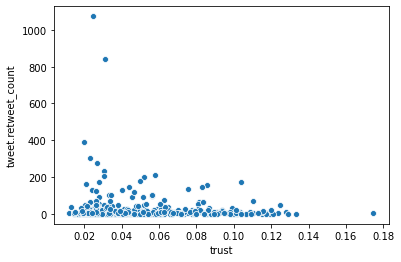

In [31]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['trust']
sns.scatterplot(x=joy, y=tweet_retweet_count)

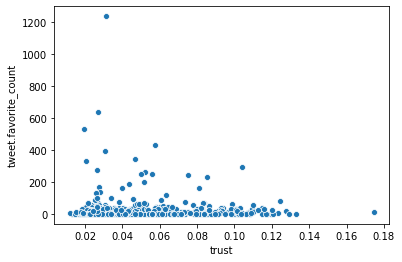

In [32]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['trust']
sns.scatterplot(x=joy, y=tweet_favorite)

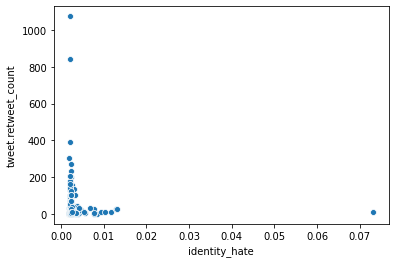

In [33]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['identity_hate']
sns.scatterplot(x=joy, y=tweet_retweet_count)

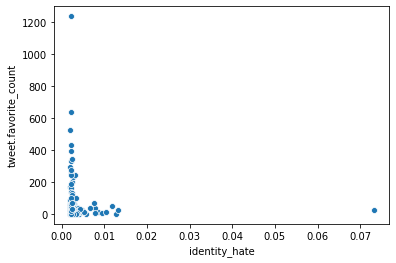

In [34]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['identity_hate']
sns.scatterplot(x=joy, y=tweet_favorite)

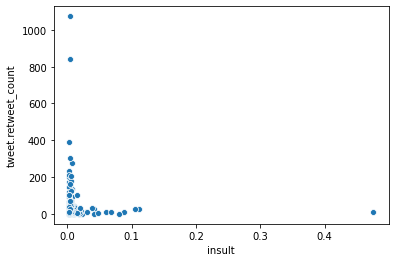

In [35]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['insult']
sns.scatterplot(x=joy, y=tweet_retweet_count)

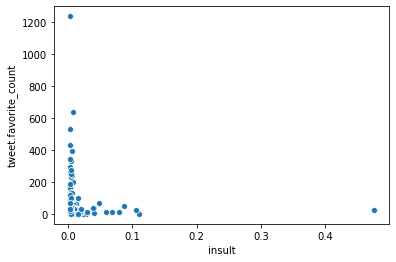

In [36]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['insult']
sns.scatterplot(x=joy, y=tweet_favorite)

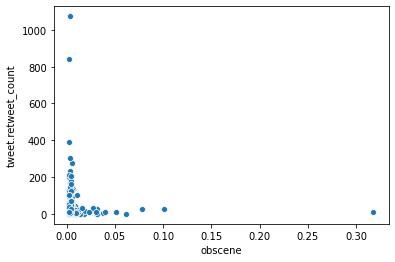

In [37]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['obscene']
sns.scatterplot(x=joy, y=tweet_retweet_count)

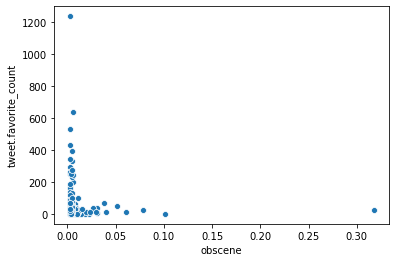

In [38]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['obscene']
sns.scatterplot(x=joy, y=tweet_favorite)

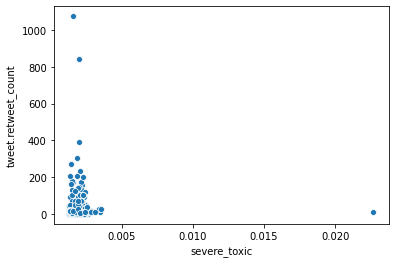

In [39]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['severe_toxic']
sns.scatterplot(x=joy, y=tweet_retweet_count)

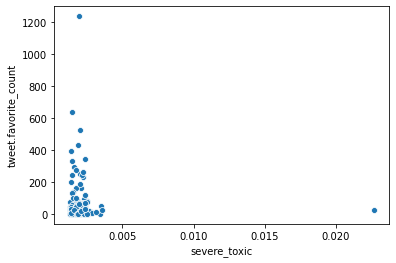

In [40]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['severe_toxic']
sns.scatterplot(x=joy, y=tweet_favorite)

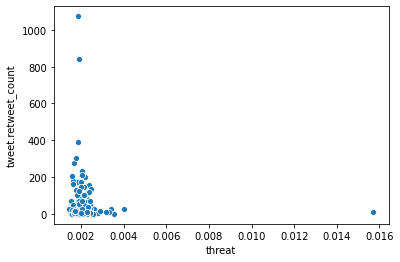

In [41]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['threat']
sns.scatterplot(x=joy, y=tweet_retweet_count)

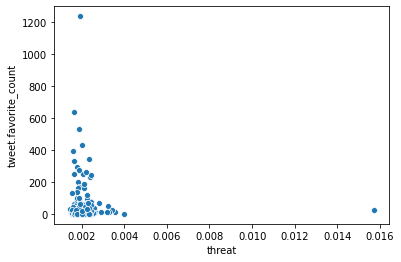

In [42]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['threat']
sns.scatterplot(x=joy, y=tweet_favorite)

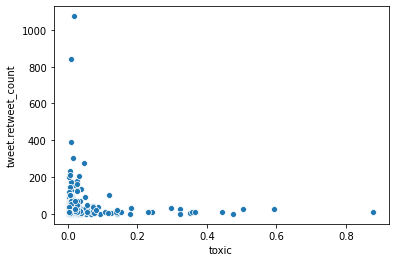

In [43]:
tweet_retweet_count = ConversationsLean['tweet.retweet_count']
joy = ConversationsLean['toxic']
sns.scatterplot(x=joy, y=tweet_retweet_count)

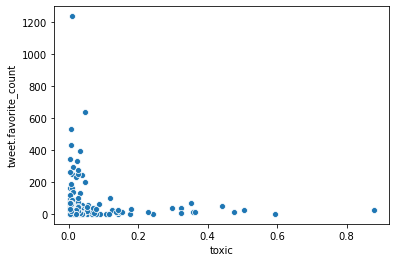

In [44]:
tweet_favorite = ConversationsLean['tweet.favorite_count']
joy = ConversationsLean['toxic']
sns.scatterplot(x=joy, y=tweet_favorite)

## Task 4. Develop and apply a function which: (1) extracts ALL the hashtags from the column 'tweet.full_text', (2) saves the result as a new column (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider lambda functions applied to a dataframe

### Tip: refer to the module labs for examples on how to use REGEX in the context of pandas dataframes

In [45]:
ConversationsLean['hashtags_extracted']=ConversationsLean['tweet.full_text'].apply(lambda x:re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)'    , x))



In [46]:
ConversationsLean[['tweet.full_text','hashtags_extracted']].head(30)

,tweet.full_text,hashtags_extracted
0,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","[#plasticpollutes, #recyclingisnottheanswer]"
1,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]"
2,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]"
3,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"[#reuse, #recycling]"
4,Is it time to remake recycling? Listen to the story to find out more. #recyclingisnotenough #breakfreefromplastic https://t.co/0EYuBWulSr,"[#recyclingisnotenough, #breakfreefromplastic]"
5,"Exciting innovation in the world of #plastic packaging and #recycling in collaboration with some of our members on the #UKPlasticsPact. New #tech designed to transform how packaging is used, recycled, sorted and reprocessed. #CircularEconomy https://t.co/8Tk76Q4UAH","[#plastic, #recycling, #UKPlasticsPact, #tech, #CircularEconomy]"
6,Local authorities are collecting 10% more plastic packaging since 2013 #ukplasticspact #changeplasticforgood #recycling https://t.co/k6iiglcVwm https://t.co/bcVJ3Cnrdw,"[#ukplasticspact, #changeplasticforgood, #recycling]"
7,How much #plastic are we creating? Our latest report examines the amount of plastics put on the UK market in the last year – and what we do with it #plastics #recycling #ukplasticspact https://t.co/k6iiglcVwm https://t.co/FtwyXBBq2O,"[#plastic, #plastics, #recycling, #ukplasticspact]"
8,New report shows more focus needed to develop sustainable end markets for recycled #plastics #changeplasticforgood #recycling https://t.co/k6iiglcVwm,"[#plastics, #changeplasticforgood, #recycling]"
9,We're looking to fund projects which are collecting and recycling non-household business waste. Closing date Wednesday! #funding #recycling https://t.co/PR7bBefCyX https://t.co/B0miOw3i7c,"[#funding, #recycling]"


## Task 5. what are the differences between stakeholders ?   (30%)

### Tip: explore differences in terms of emotions, popularity, hashtags used, number of tweets,etc

In [47]:
pd.DataFrame(ConversationsLean.groupby('stakeholder')['anger','fear', 'joy', 'love', 'sadness', 'trust', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'].mean())

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
stakeholder,,,,,,,,,,,,
Artist,0.191531,0.142912,0.511195,0.123589,0.179675,0.054033,0.002312,0.004153,0.003898,0.001976,0.002006,0.017433
Multinational,0.158001,0.157787,0.523263,0.105483,0.160258,0.063770,0.002394,0.002865,0.002714,0.002283,0.002258,0.005048
NGO,0.356121,0.245599,0.293706,0.063486,0.272420,0.048228,0.002920,0.008715,0.006713,0.002021,0.002076,0.038602
OtherInstitution,0.207091,0.169765,0.394409,0.059978,0.188679,0.056795,0.002396,0.002867,0.002694,0.002226,0.002192,0.005053
Scientific,0.283057,0.160679,0.407954,0.098758,0.244664,0.051185,0.002766,0.008543,0.007881,0.001990,0.002107,0.042202


In [48]:
ConversationsLean.groupby('stakeholder')['tweet.retweet_count', 'tweet.favorite_count', 'tweet.user.friends_count'].sum()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,tweet.retweet_count,tweet.favorite_count,tweet.user.friends_count
stakeholder,,,
Artist,281.0,146.0,122684
Multinational,391.0,1057.0,77096
NGO,9322.0,11196.0,1339305
OtherInstitution,512.0,633.0,87896
Scientific,680.0,30.0,22155


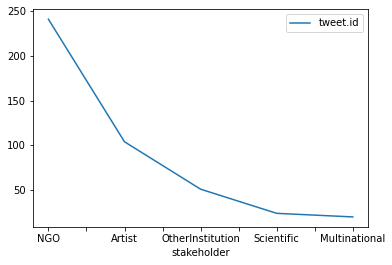

In [49]:
df = ConversationsLean.groupby('stakeholder')['tweet.id'].count()
df = df.sort_values(ascending=False)
df.plot(style='-', legend = True)

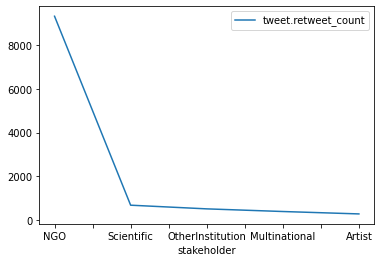

In [50]:
df = ConversationsLean.groupby('stakeholder')['tweet.retweet_count'].sum()
df = df.sort_values(ascending=False)
df.plot(style='-', legend = True)

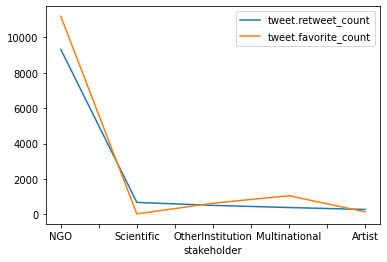

In [51]:
df1 = ConversationsLean.groupby(['stakeholder'])[['tweet.retweet_count','tweet.favorite_count']].sum()
df1 = df1.sort_values(by=['tweet.retweet_count'],ascending=False)
df1.plot(style='-', legend = True)

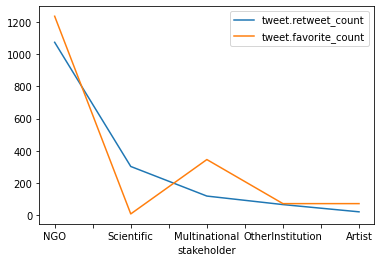

In [58]:
df2 = ConversationsLean.groupby(['stakeholder'])[['tweet.retweet_count','tweet.favorite_count']].max()
df2 = df2.sort_values(by=['tweet.retweet_count'],ascending=False)
df2.plot(style='-', legend = True)

In [53]:
ConversationsLean.groupby('stakeholder')['tweet.favorite_count'].count()

stakeholder
Artist              104
Multinational        20
NGO                 241
OtherInstitution     51
Scientific           24
Name: tweet.favorite_count, dtype: int64

In [54]:
ConversationsLean.groupby('stakeholder')['hashtags_extracted'].sum()

stakeholder
Artist              [#recycling, #recycling, #packaging, #plasticfreejuly, #muttschitt, #plasticfree, #plasticpollution, #plasticfree, #environment, #environmen, #wastedialog, #plasticfree, #plasticfree, #wastedialog, #plasticfree, #wastedialog, #killthekcup, #plasticfree, #health, #womenshealth, #plasticfree, #EcoWed, #Ecowed, #plasticfree, #EcoWed, #EcoWed, #plasticfree, #plasticfree, #GleeGum, #plasticfree, #o...
Multinational       [#Gerber, #TerraCycle, #recycling, #beatplasticpollution, #environment, #sustainability, #sustainability, #recycling, #circulareconomy, #recycling, #recycling, #NewPlasticEconomy, #circulareconomy, #beatplasticpollution, #sustainability, #packaging, #BeatPlasticPollution, #circulareconomy, #circulareconomy, #GoodLife, #BeatPlasticPollution, #sustainability, #Nestle, #circulareconomy, #BeatPlas...
NGO                 [#plasticpollutes, #recyclingisnottheanswer, #recycling, #plasticpollution, #plastics, #plasticpollutes, #recycling, #plasticpol

In [59]:
ConversationsLean.groupby('stakeholder')['hashtags_extracted'].max()

stakeholder
Artist                                            [#wastedialog, #plasticfree]
Multinational       [#veolia, #nestle, #BeatPlasticPolution, #circulareconomy]
NGO                                                [#viralvideo, #plasticfree]
OtherInstitution          [#ukplasticspact, #changeplasticforgood, #recycling]
Scientific                                                        [#recycling]
Name: hashtags_extracted, dtype: object

In [31]:
ConversationsLean['Number of hashtags']= ConversationsLean['tweet.full_text'].apply(lambda x:len(re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', x)))

In [35]:
ConversationsLean.groupby('stakeholder')['Number of hashtags'].sum()

stakeholder
Artist               78
Multinational        50
NGO                 462
OtherInstitution    118
Scientific           38
Name: Number of hashtags, dtype: int64

## Task 6. what are your recommendations for Coca Cola as far as social media is concerned ?   (20%)

In [ ]:
please refer to word doc